<a href="https://colab.research.google.com/github/isb-cgc/Community-Notebooks/blob/master/HTAN/Python%20Notebooks/Explore_HTAN_Clinical_Biospecimen_Assay_Metadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore HTAN Clinical, Biospecimen, and Assay Metadata


        Title:   Explore HTAN Clinical, Biospecimen, and Assay Metadata in Python
        Author:  Clarisse Lau (clau@systemsbiology.org)
        Created: 2022-07-27
        Updated: 2025-06-06
        Purpose: Explore HTAN metadata tables in Python

# 1. Introduction & Overview
[HTAN](https://humantumoratlas.org/) is a National Cancer Institute (NCI)-funded Cancer Moonshot initiative to construct 3-dimensional atlases of the dynamic cellular, morphological, and molecular features of human cancers as they evolve from precancerous lesions to advanced disease. [Cell April 2020](https://www.sciencedirect.com/science/article/pii/S0092867420303469)

Clinical data, sample biospecimen data, and assay files in HTAN have a rich set of annotations supplied by HTAN data contributors. These annotations are made according to the [HTAN Data model](https://data.humantumoratlas.org/standards), a set of standards defined by the HTAN consortium. The supplied values of these attributes have been collected into comprehensive data tables on the cloud, using the Google BigQuery structure that is part of the Google Cloud Project.

This notebook shows one example of how data can be accessed and analyzed using Python.

## 1.1 Goal
This example notebook illustrates how to make use of HTAN Google BigQuery metadata tables to tabulate and plot available HTAN clinical, biospecimen, and assay metadata describing files available from [HTAN](https://data.humantumoratlas.org/). Summaries for other available metadata attributes can be generated by extending these examples.

## 1.2 Inputs, Outputs, & Data
The originating data can be found on the [HTAN Data Portal](https://data.humantumoratlas.org/), and the compiled tables are on the [Cancer Gateway in the Cloud](https://isb-cgc.appspot.com/).

## 1.3 Notes
The queries and results in this notebook correspond to ISB-CGC's most current HTAN Release.

To choose a specific release, edit the BigQuery table names in this notebook by replacing the relevant string endings:
- `current` with a selected numbered release, e.g., `r2`
- `HTAN` with `HTAN_versioned`
- `gc` with `cds` (if applicable)

#
### ⚠️PAUSE
Notebooks associated with ISB-CGC HTAN Releases 6.0 or earlier are based on the **HTAN Phase 1 Data Model**. Please be aware that the structure, terminology, and available data elements may differ from those in Phase 2. 

# 2. Environment & Module Setup



In [1]:
# Import libraries
import pandas as pd

The following snippet controls plotting parameters.

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

# 3. Google Authentication

Running the BigQuery cells in this notebook requires a Google Cloud Project. Instructions for creating a project can be found in [Google Cloud Documentation](https://cloud.google.com/resource-manager/docs/creating-managing-projects#console). The instance needs to be authorized to bill the project for queries. For more information on getting started with ISB-CGC see [Quick Start Guide to ISB-CGC](https://isb-cancer-genomics-cloud.readthedocs.io/en/latest/sections/HowToGetStartedonISB-CGC.html) and alternative authentication methods can be found in [Google Cloud Documentation](https://cloud.google.com/resource-manager/docs/creating-managing-projects#console).

## 3.1 Authenticating with Google Credentials

#### Option 1. Running in Google Colab

If you are using Google Colab, run the code block below to authenticate

In [3]:
from google.colab import auth
auth.authenticate_user()

#### Option 2. Running on local machine

Alternatively, if you're running the notebook locally, take the following steps to authenticate.

1.   Run `gcloud auth application-default login` on your local machine
2.   Run the command below replacing `<path to key>` with the path to your credentials file

In [ ]:
# env GOOGLE_APPLICATION_CREDENTIALS='<path to key>'

## 3.2 Initializing the Google BigQuery client


In [3]:
# Import the Google BigQuery client
from google.cloud import bigquery

# Set the Google project that will be billed for this notebook's computations
# Replace <my-project> with your BigQuery Project ID
google_project = '<my-project>'

# Create a client to access the data within BigQuery
client = bigquery.Client(google_project)

# 4. Analyzing Clinical Data in HTAN

In the [HTAN Data model](https://data.humantumoratlas.org/standards), [Tier 1 Clinical Data](https://data.humantumoratlas.org/standard/clinical) has seven components:

1.   Demographics
2.   Diagnosis
3.   Exposure
4.   Family History
5.   Follow Up
6.   Molecular Test
7.   Therapy

All HTAN demographic data is collected into a single Demographics table [isb-cgc-bq.HTAN.clinical_tier1_demographics_current](https://bq-search.isb-cgc.org/search?datasetId=%27HTAN%27&projectId=%27isb-cgc-bq%27&show_details=true&tableId=%27clinical_tier1_demographics_current%27&include_always_newest=true) in Google BigQuery containing data across all [HTAN Centers](https://humantumoratlas.org/research-network). The same is true of Diagnosis, and so on.

## 4.1 Demographics
Let's look at demographic distributions in HTAN. We begin by constructing an SQL query (as a string), then sending that
as query to HTAN Google BigQuery to retrieve the Demographics table. We remove a few unneeded bookkeeping columns.

In [4]:
demographics = client.query("""
  SELECT DISTINCT *
  EXCEPT(entityId, Component, Manifest_Id, Manifest_Version, Id)
  FROM `isb-cgc-bq.HTAN.clinical_tier1_demographics_current`
    """).result().to_dataframe()

demographics['HTAN_Center'] = [x.replace('HTAN ','') for x in demographics['HTAN_Center']]
demographics

,Race,Days_to_Vital_Status_Reference,Year_Of_Birth,Age_Is_Obfuscated,Year_of_Death,Country_of_Residence,Ethnicity,Gender,Vital_Status,HTAN_Participant_ID,Days_to_Birth,Weeks_Gestation_at_Birth,Days_to_Death,Premature_At_Birth,Occupation_Duration_Years,Cause_of_Death,Cause_of_Death_Source,HTAN_Center
0,white,None,None,True,Not Applicable,None,not hispanic or latino,female,Alive,HTA1_272,0,None,None,None,None,None,None,HTAPP
1,white,None,None,True,2018,None,not hispanic or latino,male,Dead,HTA1_273,0,None,None,None,None,Cancer Related,None,HTAPP
2,white,None,None,True,Not Applicable,None,not hispanic or latino,female,Alive,HTA1_326,0,None,None,None,None,None,None,HTAPP
3,white,None,None,True,Not Applicable,None,not hispanic or latino,female,Alive,HTA1_335,0,None,None,None,None,None,None,HTAPP
4,white,None,None,True,Not Applicable,None,not hispanic or latino,female,Alive,HTA1_357,0,None,None,None,None,None,None,HTAPP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,white,None,None,None,None,None,Not Reported,Male,unknown,HTA10_40,None,None,None,None,None,Not Cancer Related,None,Stanford
2557,unknown,8760.0,None,None,None,None,hispanic or latino,Male,Alive,HTA10_15,None,None,None,None,None,None,None,Stanford
2558,unknown,18980.0,None,None,None,None,hispanic or latino,Male,Alive,HTA10_16,None,None,None,None,None,None,None,Stanford
2559,white,None,None,True,None,None,Not Reported,male,Alive,HTA13_1,None,None,None,None,None,None,None,TNP SARDANA


In [5]:
# get the number of distinct participants
len(set(demographics['HTAN_Participant_ID']))

2553

Each row in this table represents a participant for which demographic information is reported. In some cases, participant demographic info was submitted more than once to represent a patient update, such as a change in `Vital Status`.

We have a total of 2553 demographic records as of HTAN's most current Data Release.

Participants per HTAN center

In [6]:
demographics.groupby(['HTAN_Center'])['HTAN_Participant_ID'].count()

HTAN_Center
BU             484
CHOP            69
DFCI           156
Duke           828
HMS            130
HTAPP          205
MSK            134
OHSU            21
Stanford        39
TNP - TMA       51
TNP SARDANA      2
Vanderbilt     173
WUSTL          269
Name: HTAN_Participant_ID, dtype: int64

You will see some differences between this table and the case counts on the [HTAN Data Portal](https://humantumoratlas.org/).
(Some contributing factors: This notebook is fixed to HTAN data Release 6.0, while the portal has additional data. The portal case inclusion criterion does not correspond to this simple row count.)

The columns in the Demographics table each represent a demographic attribute as defined in the HTAN [Clinical Tier 1 Demographics Data Model](https://data.humantumoratlas.org/standard/clinical). They include:

In [7]:
demographics.columns.tolist()

['Race',
 'Days_to_Vital_Status_Reference',
 'Year_Of_Birth',
 'Age_Is_Obfuscated',
 'Year_of_Death',
 'Country_of_Residence',
 'Ethnicity',
 'Gender',
 'Vital_Status',
 'HTAN_Participant_ID',
 'Days_to_Birth',
 'Weeks_Gestation_at_Birth',
 'Days_to_Death',
 'Premature_At_Birth',
 'Occupation_Duration_Years',
 'Cause_of_Death',
 'Cause_of_Death_Source',
 'HTAN_Center']

### 4.1.1 Race
Race is one of the Demographics attributes. Let's tabulate reported Race in HTAN and report the fraction as a percent.

In [8]:
demographics_race_reported = demographics[
    ~demographics['Race'].isin(
    ['unknown','Unknown','Not Reported','not allowed to collect'])]

# ensure references to male and female are lowercase
demographics_race_reported = demographics_race_reported.copy()
demographics_race_reported['Race'] = demographics_race_reported['Race'].str.lower()

count = demographics_race_reported.Race.value_counts().rename_axis('Race').to_frame('n')

perc = demographics_race_reported['Race'].value_counts(
    normalize=True).rename_axis('Race').to_frame('Percent').round(decimals=3) * 100

pd.merge(count, perc, on='Race', how='inner')

,n,Percent
Race,,
white,1730,81.7
black or african american,321,15.2
asian,46,2.2
other,20,0.9


Here is a barchart showing the distribution

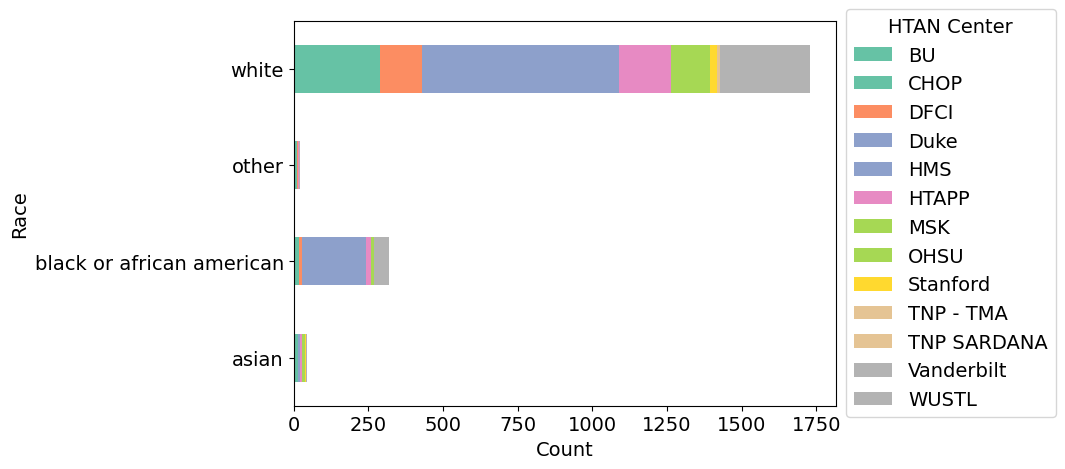

In [9]:
plt.rcParams.update({'font.size': 14})

demographics_race_reported.groupby(
    ['Race','HTAN_Center']).size().unstack().plot.barh(stacked=True,
    figsize=(7,5), colormap='Set2')

plt.xlabel('Count')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='HTAN Center')
plt.show()

### 4.1.2 Gender
Similarly, here's a barchart showing the breakdown by Gender.

In [10]:
# remove unknowns
demographics_gender_reported = demographics[
    ~demographics['Gender'].isin(['Not Reported','unknown','Unknown'])]

# ensure references to male and female are lowercase
demographics_gender_reported = demographics_gender_reported.copy()
demographics_gender_reported['Gender'] = demographics_gender_reported['Gender'].str.lower()

demographics_gender_reported = demographics_gender_reported[['Gender','HTAN_Participant_ID']].drop_duplicates()
count = demographics_gender_reported.Gender.value_counts().rename_axis('Gender').to_frame('n')

perc = demographics_gender_reported['Gender'].value_counts(
    normalize=True).rename_axis('Gender').to_frame('Percent').round(decimals=3) * 100

pd.merge(count, perc, on='Gender', how='inner')

,n,Percent
Gender,,
female,1718,73.0
male,636,27.0


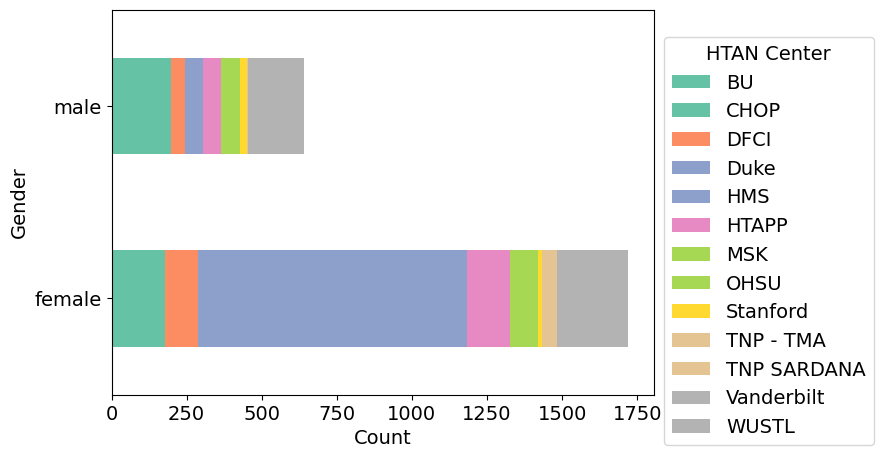

In [11]:
# remove unknowns
demographics_gender_reported = demographics[
    ~demographics['Gender'].isin(['Not Reported','unknown','Unknown'])]

# ensure references to male and female are lowercase
demographics_gender_reported = demographics_gender_reported.copy()
demographics_gender_reported['Gender'] = demographics_gender_reported['Gender'].str.lower()

plt.rcParams.update({'font.size': 14})

demographics_gender_reported.groupby(
    ['Gender','HTAN_Center']).size().unstack().plot.barh(
    stacked=True, figsize=(7,5), colormap='Set2')

plt.xlabel('Count')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.4), title='HTAN Center')
plt.show()

## 4.2 Treatment
Let's take a look at annotated treatment in HTAN. This can be found in the Therapy table.

In [12]:
therapy = client.query("""
  SELECT DISTINCT * EXCEPT(entityId, Component, Manifest_Id, Manifest_Version, Id)
  FROM `isb-cgc-bq.HTAN.clinical_tier1_therapy_current`
    """).result().to_dataframe()

therapy['HTAN_Center'] = [x.replace('HTAN ','') for x in therapy['HTAN_Center']]
therapy

,Treatment_or_Therapy,Treatment_Anatomic_Site,Regimen_or_Line_of_Therapy,Treatment_Effect_Indicator,Treatment_Intent_Type,Reason_Treatment_Ended,Days_to_Treatment_Start,Initial_Disease_Status,Chemo_Concurrent_to_Radiation,Treatment_Dose_Units,...,Treatment_Effect,Treatment_Arm,HTAN_Participant_ID,Treatment_Type,Treatment_Dose,Treatment_Outcome,Number_of_Cycles,Days_to_Treatment_End,Therapeutic_Agents,HTAN_Center
0,No,None,None,None,None,None,None,None,None,None,...,None,None,HTA1_272,None,None,None,None,None,None,HTAPP
1,No,None,None,None,None,None,None,None,None,None,...,None,None,HTA1_273,None,None,None,None,None,None,HTAPP
2,No,None,None,None,None,None,None,None,None,None,...,None,None,HTA1_326,None,None,None,None,None,None,HTAPP
3,No,None,None,None,None,None,None,None,None,None,...,None,None,HTA1_335,None,None,None,None,None,None,HTAPP
4,No,None,None,None,None,None,None,None,None,None,...,None,None,HTA1_357,None,None,None,None,None,None,HTAPP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,None,None,None,None,None,None,None,None,None,None,...,None,None,HTA10_11,None,None,None,None,None,None,Stanford
2683,None,None,None,None,None,None,None,None,None,None,...,None,None,HTA10_12,None,None,None,None,None,None,Stanford
2684,None,None,None,None,None,None,None,None,None,None,...,None,None,HTA10_13,None,None,None,None,None,None,Stanford
2685,Yes,None,None,None,None,None,None,Initial Diagnosis,None,None,...,None,None,HTA13_1,Chemotherapy,None,None,None,None,Oxaliplatin,TNP SARDANA


Now filter this table to retrieve instances of annotated therapy.

In [13]:
therapy_yes = therapy[
    (therapy['Treatment_or_Therapy'].isin(["Yes"]) |
     ~therapy['Treatment_Type'].isnull()) &
    ~therapy['Treatment_Type'].isin(["Not Reported", "None",
                                     "unknown",'Not Reported,'])]
therapy_yes

,Treatment_or_Therapy,Treatment_Anatomic_Site,Regimen_or_Line_of_Therapy,Treatment_Effect_Indicator,Treatment_Intent_Type,Reason_Treatment_Ended,Days_to_Treatment_Start,Initial_Disease_Status,Chemo_Concurrent_to_Radiation,Treatment_Dose_Units,...,Treatment_Effect,Treatment_Arm,HTAN_Participant_ID,Treatment_Type,Treatment_Dose,Treatment_Outcome,Number_of_Cycles,Days_to_Treatment_End,Therapeutic_Agents,HTAN_Center
20,Yes,None,None,None,None,None,None,None,None,None,...,None,None,HTA1_988,None,None,None,None,None,None,HTAPP
21,Yes,None,None,None,None,None,None,None,None,None,...,None,None,HTA1_889,None,None,None,None,None,None,HTAPP
22,Yes,None,None,None,None,None,None,None,None,None,...,None,None,HTA1_330,None,None,None,None,None,None,HTAPP
23,Yes,None,None,None,None,None,None,None,None,None,...,None,None,HTA1_963,None,None,None,None,None,None,HTAPP
24,Yes,None,None,None,None,None,None,None,None,None,...,None,None,HTA1_611,None,None,None,None,None,None,HTAPP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,Yes,Breast NOS,None,None,None,Disease Progression,23667,Progressive Disease,None,None,...,unknown,None,HTA5_1610,Chemotherapy,None,Progressive Disease,None,23779.0,None,DFCI
1839,Yes,Breast NOS,None,None,None,Disease Progression,23667,Progressive Disease,None,None,...,unknown,None,HTA5_1610,Other,None,Progressive Disease,None,23779.0,pertuzumab,DFCI
1840,Yes,Breast NOS,None,None,None,Disease Progression,23667,Progressive Disease,None,None,...,unknown,None,HTA5_1610,Other,None,Progressive Disease,None,23779.0,trastuzumab deruxtecan,DFCI
1841,Yes,Breast NOS,None,None,None,Death,23807,Progressive Disease,None,None,...,unknown,None,HTA5_1610,Other,None,Stable Disease,None,24048.0,trastuzumab deruxtecan,DFCI


In [14]:
len(set(therapy_yes['HTAN_Participant_ID']))

535

There are 1434 therapy annotations in total, for 535 participants.

By center and treatment type:

In [15]:
therapy_yes.groupby(['HTAN_Center','Treatment_Type'])['Treatment_Type'].count()

HTAN_Center  Treatment_Type                                                            
BU           Chemotherapy                                                                    5
             Concurrent Chemoradiation                                                       1
             Radiation Therapy NOS                                                           1
CHOP         Chemotherapy                                                                   25
DFCI         Ablation Cryo                                                                   1
             Bisphosphonate Therapy                                                          1
             Chemotherapy                                                                  228
             External Beam Radiation                                                         2
             Hormone Therapy                                                               177
             Immunotherapy (Including Vaccines)          

# 5. Analyzing Biospecimen Data in HTAN
Biospecimen data in HTAN conforms to the [Biospecimen Data](https://data.humantumoratlas.org/standard/biospecimen) standard,
and all annotated values can be obtained in a single BigQuery table.

In [16]:
biospecimen = client.query("""
  SELECT * EXCEPT(Component, entityId, Manifest_Id, Manifest_Version, Id)
  FROM `isb-cgc-bq.HTAN.biospecimen_current`
    """).result().to_dataframe()

biospecimen['HTAN_Participant_ID'] = biospecimen['HTAN_Biospecimen_ID'].str.split('_').str[:-1].str.join('_')
biospecimen

,Adjacent_Biospecimen_IDs,Lysis_Buffer,Site_Data_Source,Percent_Neutrophil_Infiltration,HTAN_Biospecimen_ID,Fixative_Type,Ischemic_Temperature,Processing_Days_from_Index,Storage_Method,Number_Proliferating_Cells,...,Analyte_Type,Section_Thickness_Value,Percent_Normal_Cells,Total_Volume,Dysplasia_Fraction,Histologic_Morphology_Code,HTAN_Parent_ID,Tumor_Tissue_Type,HTAN_Center,HTAN_Participant_ID
0,None,None,None,None,HTA1_272_4831,None,None,20280,Fresh,None,...,None,None,None,None,None,8140/3,HTA1_272,Primary,HTAN HTAPP,HTA1_272
1,None,None,None,None,HTA1_272_48311,None,None,20280,Fresh,None,...,None,None,None,None,None,8140/3,HTA1_272_4831,Primary,HTAN HTAPP,HTA1_272
2,None,None,None,None,HTA1_272_4831101,None,None,20280,unknown,None,...,None,None,None,None,None,8140/3,HTA1_272_48311,Primary,HTAN HTAPP,HTA1_272
3,None,None,None,None,HTA1_272_48312,None,None,20280,Frozen in vapor phase,None,...,None,None,None,None,None,8140/3,HTA1_272_4831,Primary,HTAN HTAPP,HTA1_272
4,None,None,None,None,HTA1_272_4831201,None,None,20621,unknown,None,...,None,None,None,None,None,8140/3,HTA1_272_48312,Primary,HTAN HTAPP,HTA1_272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,None,None,None,None,HTA15_51430_1514,Unfixed,None,29598,Frozen at -80C,None,...,DNA Analyte,Not applicable,None,None,None,None,HTA15_51430_1512,None,HTAN SRRS,HTA15_51430
11206,None,None,None,None,HTA15_51703_1006,Unfixed,None,22718,Frozen at -80C,None,...,None,None,None,None,None,8771/3,HTA15_51703_1005,Additional Primary,HTAN SRRS,HTA15_51703
11207,None,None,None,None,HTA15_51703_1602,Unfixed,None,23236,Frozen at -80C,None,...,None,None,None,None,None,8771/3,HTA15_51703_1006,Additional Primary,HTAN SRRS,HTA15_51703
11208,None,None,None,None,HTA15_51703_1603,Unfixed,None,23456,Frozen at -80C,None,...,RNA Analyte,Not applicable,None,None,None,None,HTA15_51703_1602,None,HTAN SRRS,HTA15_51703


In [17]:
len(set(biospecimen['HTAN_Biospecimen_ID']))

11200

In [18]:
len(set(biospecimen['HTAN_Participant_ID']))

2205

There are 11200 unique biospecimens from 2205 participants

As an example, let's take a look at the various storage methods used for HTAN biospecimens

## 5.1 Storage Methods

In [19]:
biospecimen_storage_noted = biospecimen[
    ~biospecimen['Storage_Method'].isin(
    ['unknown','Unknown','Not Applicable'])]
pd.crosstab(
    biospecimen_storage_noted.Storage_Method,
    biospecimen_storage_noted.HTAN_Center)

HTAN_Center,HTAN BU,HTAN CHOP,HTAN DFCI,HTAN Duke,HTAN HMS,HTAN HTAPP,HTAN MSK,HTAN OHSU,HTAN SRRS,HTAN Stanford,HTAN TNP - TMA,HTAN TNP SARDANA,HTAN Vanderbilt,HTAN WUSTL
Storage_Method,,,,,,,,,,,,,,
Ambient temperature,387,0,0,0,118,0,0,229,0,6,0,0,0,0
Fresh,15,0,68,0,0,516,133,0,2,12,0,0,204,0
Frozen at -150C,0,0,0,0,0,13,0,0,0,0,0,0,0,0
Frozen at -80C,1273,0,372,0,222,324,0,55,24,0,0,0,124,776
Frozen in liquid nitrogen,0,125,0,0,0,66,62,0,0,258,0,0,0,156
Frozen in vapor phase,0,0,0,0,0,41,0,76,0,0,0,0,0,0
Paraffin block,0,0,6,1364,0,125,142,0,0,0,0,0,3,30
Refrigerated at 4 degrees,88,0,0,0,521,0,0,9,0,0,1708,73,0,94


# 6. Assay types in HTAN

HTAN data is generated from multiple assay types, probing cancers and the tumor microenvironment at molecular, cellular, and tissue level,
using bulk, single-cell, and spatial assays. As described on the [HTAN Data Standards](https://data.humantumoratlas.org/standards)
page, generated data are arranged into data "Levels" corresponding to bioinformatic processing steps. In BigQuery, each
assay type and level is collected into a single table.

For example, we can take a look at Single Cell RNA-seq Level 4 metadata by querying the table [isb-cgc-bq.HTAN.scRNAseq_level4_metadata_current](https://bq-search.isb-cgc.org/search?datasetId=%27HTAN%27&projectId=%27isb-cgc-bq%27&show_details=true&tableId=%27scRNAseq_level4_metadata_current%27&include_always_newest=true):

In [20]:
scl4 = client.query("""
  SELECT * FROM `isb-cgc-bq.HTAN.scRNAseq_level4_metadata_current`
  """).result().to_dataframe()

scl4

,HTAN_Parent_Data_File_ID,scRNAseq_Workflow_Type,Id,scRNAseq_Workflow_Parameters_Description,entityId,Component,HTAN_Data_File_ID,Workflow_Version,Workflow_Link,Filename,File_Format,HTAN_Center,Manifest_Id,Manifest_Version,File_Size,md5,Data_Release,GC_Release
0,"HTA1_443_54912011011,HTA1_443_54912011012,HTA1...",Cell annotation,60a97b8b-328d-493d-8943-3435f5f1909f,Cells were filtered using cutoffs for number o...,syn26156529,ScRNA-seqLevel4,HTA1_443_549120110111,Not Available,Not Available,single_cell_RNAseq_level_4_glioma/glioma_10x_H...,tsv,HTAN HTAPP,syn35558479,4,3874079,be838517b9666d795ddf09288efe9889,Release 3.0,None
1,"HTA1_443_5491205001011,HTA1_443_5491205001012,...",Cell annotation,9d372ea0-8611-403e-93c2-b09e951e3b0b,Cells were filtered using cutoffs for number o...,syn26156530,ScRNA-seqLevel4,HTA1_443_54912050010111,Not Available,Not Available,single_cell_RNAseq_level_4_glioma/glioma_ss2_H...,tsv,HTAN HTAPP,syn35558479,4,163077,22114a593cbdc69ce5fb27519bb6c27b,Release 3.0,None
2,"HTA1_203_3321011011,HTA1_203_3321011012,HTA1_2...",Cell annotation,96ca1630-f554-4311-8e1e-9547afa1d75a,Cells were filtered using cutoffs for number o...,syn26127167,ScRNA-seqLevel4,HTA1_203_33210110111,Not Available,Not Available,single_cell_RNAseq_level_4_lung/lung_HTA1_203_...,tsv,HTAN HTAPP,syn35558619,5,349132,bd89af6a465b47f282d174093e414ec9,Release 3.0,None
3,"HTA1_203_3321011011,HTA1_203_3321011012,HTA1_2...",Cell annotation,9b847cde-7a42-4ebf-8a2d-ec5eb611c7ae,Cells were filtered using cutoffs for number o...,syn26127160,ScRNA-seqLevel4,HTA1_203_33210210111,Not Available,Not Available,single_cell_RNAseq_level_4_lung/lung_HTA1_203_...,tsv,HTAN HTAPP,syn35558619,5,47932,3528ab4e3e09adbc0528d4b2d3b1a162,Release 6.0,None
4,"HTA1_203_3321025011,HTA1_203_3321025012,HTA1_2...",Cell annotation,72c8d1ce-dcc8-4e67-9109-50b3091f2ae0,Cells were filtered using cutoffs for number o...,syn26127159,ScRNA-seqLevel4,HTA1_203_33210250111,Not Available,Not Available,single_cell_RNAseq_level_4_lung/lung_HTA1_203_...,tsv,HTAN HTAPP,syn35558619,5,186743,9f6bd92406904240dc3a072c78215212,Release 3.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,"HTA8_1005_330001,HTA8_1028_310001,HTA8_1029_31...",SEQC,3f05aeac-0708-40ab-9d46-1dc6c2d246ce,scHPF was run with default hyperparameters and...,syn49693591,ScRNA-seqLevel4,HTA8_4_100276,scHPF 0.5.0,https://schpf.readthedocs.io/en/latest/index.html,glasner_etal_single_cell_RNAseq_level_4/myeloi...,csv,HTAN MSK,syn51039914,6,6042353,d8b28accd80c6122f5474573bca2ba07,Release 3.0,None
802,"HTA8_1005_330001,HTA8_1028_310001,HTA8_1029_31...",SEQC,b8fe6742-1418-4fcc-91b0-91198b7ca457,scHPF was run with default hyperparameters and...,syn49693589,ScRNA-seqLevel4,HTA8_4_100277,scHPF 0.5.0,https://schpf.readthedocs.io/en/latest/index.html,glasner_etal_single_cell_RNAseq_level_4/myeloi...,csv,HTAN MSK,syn51039914,6,6288832,bf910b0bc2200e2fc6fa20ad0b255bc3,Release 3.0,None
803,"HTA8_5001_001101, HTA8_5001_001201, HTA8_5001_...",Other,fa30454e-a365-4014-8045-6333c4f9e60b,"SEQC, cellbender, custom doublet detection met...",syn64112483,ScRNA-seqLevel4,HTA8_5001_0,scanpy 1.9.8,https://github.com/dpeerlab,HTAN MSK/jimenez-sanchez_etal_single_nuq_RNAse...,hdf5,HTAN MSK,syn64130123,1,2335132204,582bdb564af5fe276f8d7e63ce362788,Release 6.2,None
804,"HTA8_5002_001101, HTA8_5002_001201, HTA8_5002_...",Other,46a1bb3e-cd32-4ac6-88e9-68423bfa6b9a,"SEQC, cellbender, custom doublet detection met...",syn64112484,ScRNA-seqLevel4,HTA8_5002_0,scanpy 1.9.8,https://github.com/dpeerlab,HTAN MSK/jimenez-sanchez_etal_single_nuq_RNAse...,hdf5,HTAN MSK,syn64130123,1,2781990108,c6fb0c7ab712df29f6260ea6b9d11a13,Release 6.2,None


The [HTAN ID Provenance table](https://isb-cgc.appspot.com/bq_meta_search/isb-cgc-bq.HTAN.id_provenance_current/) pulls a selection of attributes from each individual assay metadata table, combining all of them into a single queryable table. For an in-depth introduction to this table, please see our notebook: [HTAN_ID_Provenance_In_BQ.ipynb](https://github.com/isb-cgc/Community-Notebooks/blob/master/HTAN/Python%20Notebooks/HTAN_ID_Provenance_In_BQ.ipynb)

Using the provenance table, we can tally the number of files available for each assay and level.

In [21]:
all_files = client.query("""
  SELECT Component, HTAN_Center, Count(*) AS Count
  FROM `isb-cgc-bq.HTAN.id_provenance_current`
  WHERE Component LIKE '%Level%'
  GROUP BY Component, HTAN_Center
  ORDER BY Component, HTAN_Center
  """).result().to_dataframe()

In [22]:
all_files.pivot_table(
    index='Component',
    columns='HTAN_Center',
    values='Count',
    fill_value=0).astype(int)

HTAN_Center,HTAN BU,HTAN CHOP,HTAN DFCI,HTAN Duke,HTAN HMS,HTAN HTAPP,HTAN MSK,HTAN OHSU,HTAN SRRS,HTAN Stanford,HTAN TNP - TMA,HTAN TNP SARDANA,HTAN Vanderbilt,HTAN WUSTL
Component,,,,,,,,,,,,,,
10xVisiumSpatialTranscriptomics-RNA-seqLevel1,0,0,0,0,0,400,0,0,0,0,0,0,104,304
10xVisiumSpatialTranscriptomics-RNA-seqLevel2,0,0,0,0,0,400,0,0,0,0,0,0,104,304
10xVisiumSpatialTranscriptomics-RNA-seqLevel3,0,0,0,0,0,336,0,0,0,0,0,0,216,1250
10xVisiumSpatialTranscriptomics-RNA-seqLevel4,0,0,0,0,0,0,0,0,0,0,0,0,200,792
BulkMethylation-seqLevel1,0,0,0,0,0,0,0,0,0,80,0,0,0,0
BulkMethylation-seqLevel2,0,0,0,0,0,0,0,0,0,80,0,0,0,0
BulkRNA-seqLevel1,826,0,0,1064,444,0,0,88,0,420,0,0,0,434
BulkRNA-seqLevel2,317,0,0,953,444,154,0,56,0,0,0,0,0,0
BulkRNA-seqLevel3,186,0,0,1727,222,0,0,38,0,72,0,0,0,0


# 7. Relevant Citations and Links

[Cell April 2020](https://www.sciencedirect.com/science/article/pii/S0092867420303469)
